In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## How well do jobs and skills pay for Data Analysts?

### Salary Distribution by Job Title

In [ ]:
# filter for the country
df_US = df[df['job_country']=='United States'].dropna(subset= 'salary_year_avg')

In [ ]:
# filter the df for the top 6 job titles
jobs = df_US['job_title_short'].value_counts().head(6).index
df_US_top6 = df_US[df_US['job_title_short'].isin(jobs)]

In [ ]:
# order the job titles by median salary
top6 = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
top6

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

### Plot Salary Distributions

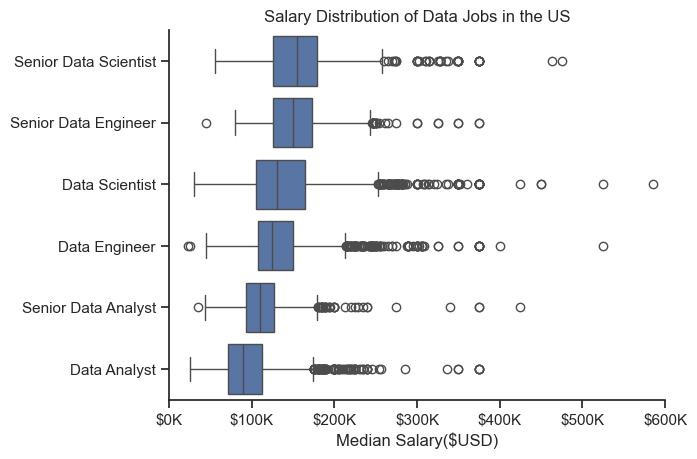

In [19]:
sns.boxplot(data=df_US_top6, x= 'salary_year_avg', y='job_title_short', order=top6)
sns.set_theme(style='ticks')
sns.despine()

plt.xlim(0,600000)
plt.xlabel('Median Salary($USD)')
plt.ylabel('')
plt.title('Salary Distribution of Data Jobs in the US')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

## Investigate Median Salary Vs Skill for Data Analysts


In [20]:
# filtering further for data analyst
df_US_DA = df_US[df_US['job_title_short'] == 'Data Analyst']

df_US_DA_exp = df_US_DA.explode('job_skills')

### Determine The Highest Paid Skills and Most Demanded Skills


In [22]:
df_skills = df_US_DA_exp.groupby('job_skills').agg(skills_count= ('job_skills', 'size'), median_salary= ('salary_year_avg', 'median'))
df_skills

,skills_count,median_salary
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [ ]:
# Top high paid skills
df_skills_top_median = df_skills.sort_values('median_salary',ascending=False).head(10)
df_skills_top_median

,skills_count,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [ ]:
# Top demanded skills
df_skills_top_count = df_skills.sort_values('skills_count',ascending=False).head(10).sort_values('median_salary',ascending=False)
df_skills_top_count # Ranked them further based on salary for the graph

,skills_count,median_salary
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


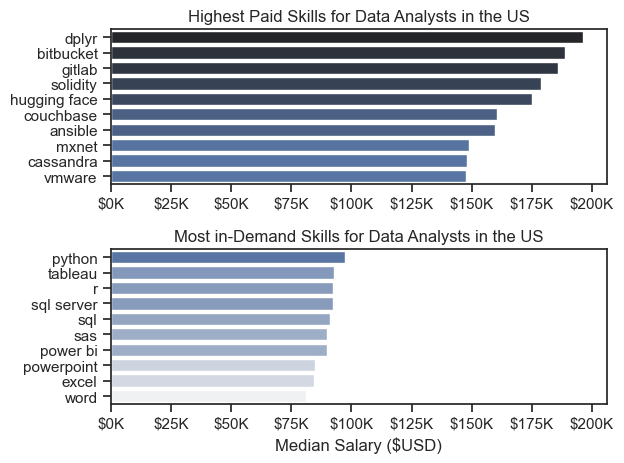

In [41]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_skills_top_median, x='median_salary', y='job_skills',hue= 'median_salary', palette='dark:b_r', ax=ax[0], legend=False)
sns.barplot(data=df_skills_top_count, x='median_salary', y='job_skills',hue= 'median_salary', palette='light:b',ax=ax[1], legend=False)
sns.set_theme(style='ticks')

ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_title('Most in-Demand Skills for Data Analysts in the US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()